# Relatório EP1 MAC0300 - Métodos Numéricos de Álgebra Linear

**nome: Ygor Tavela Alves**

**nUSP: 10687642**


## Introdução

O objetivo deste EP foi implementar algoritmos eficientes para realizar operações básicas com vetores e matrizes.

## Informações Gerais

### Modificações em relação ao cabeçalho do enunciado
Para fins de simplificação foram tomados algumas convenções, como:
- uso de matrizes quadradas n x n;
- multiplicação matriz por vetor usa matriz n x n e um vetor n x 1;
- multiplicação matriz por matriz usa duas matrizes n x n;
- usos de ponteiros para vetores e matrizes.

### Arquivos
Na pasta raiz encontra-se o diretório `src/` que contém: 
- *header* e implementação dos algoritmos propostos pelo enunciado do EP (`ep1.c` e `ep1.h`);
- *header* e implementação de funções utilitárias (`util.c` e `util.h`);
- *Makefile* para compilação do programa;
- *scripts* para geração de matrizes e vetores pseudoaleatórios (`generate_matrix.py` e `generate_vector.py`), cujos *outputs* são armazenados nos diretórios `matrix-test/` e `vector-test/`. Para utilizar-los basta usar como argumento o tamanho do vetor/matriz, por exemplo, `python3 generate_matrix.py 3` irá gerar uma matriz quadrada 3 x 3 na pasta `matrix-test/`;
- *scripts bash* (`measurement_matrix_vector.sh` e `measurement_matrix_matrix.sh`) para testes de execuções dos algoritmos de multiplicação de matriz por vetor e de multiplicação de matriz por matriz. Os logs dos testes são armazenados no diretório `time-results/`.

### Compilação do Programa
Como mencionado acima, na pasta `src/` há um ***Makefile*** que pode ser utilizado para compilação do programa, podemos compilar o programa especificamente para *debug* ou para *benchmark* de tempo. Abaixo listamos as opções para compilação com `make`:
- `make`: compilação padrão do programa gerando executável **ep1** no diretório;
- `make debug`: compilação com flag *DEBUG*, os resultados das execuções do programa **ep1** serão exibidos na tela;
- `make time`: compilação com flag *TIME_BENCHMARK*, a execução do programa **ep1** passará a exibir o tempo percorrido durante a execução da operação escolhida utilizando a função `clock_gettime` da lib `timer.h`. Vale destacar que tal medida de tempo ignora o tempo percorrido para alocação de memória, inicialização de vetor/matriz, leitura de dados e liberação de memória, ou seja, o tempo medido se refere apenas e exclusivamente à operação realizada;
- `make clean`: apaga objetos e programa.

### Execução do Programa
Para executar o programa, após compilação, utilize o comando `./ep1 #numero_operacao`, sendo #numero_operacao dado por:
1. produto interno entre dois vetores de entrada x e y com tamanho n;
2. norma euclidiana de um vetor x de tamanho n;
3. produto matriz A por vetor x seguindo loop da matriz por linhas;
4. produto matriz A por vetor x seguindo loop da matriz por colunas;
5. produto matriz A por matriz X seguindo ordem de loop jki;
6. produto matriz A por matriz X seguindo ordem de loop ikj.

#### Entrada do Programa
Para cada uma das opções de execuções, espera-se as seguintes entradas:
1. Espera-se a entrada de dois vetores de tamanho n, por exemplo:
```
3
1 5 6
3
4 3 7
```
um exemplo de execução utilizando vetores de teste em `vector-test/` seria:
```
cat vector-test/vector-4 vector-test/vector-4 | ./ep1 1
```
2. Espera-se a entrada de um vetor de tamanho n, por exemplo:
```
3
1 5 6
```
um exemplo de execução utilizando um vetor de teste em `vector-test/` seria:
```
cat vector-test/vector-256 | ./ep1 2
```
3. Espera-se a entrada de uma matriz quadrada n x n e um vetor de tamanho n, por exemplo:
```
3
6 7 4
2 5 9
1 2 8
3
1 5 6
```
um exemplo de execução utilizando uma matriz de teste em `matrix-test/` e um vetor de teste em `vector-test/` seria:
```
cat matrix-test/matrix-256 vector-test/vector-256 | ./ep1 3
```
4. Análogo a opção **3**, um exemplo com testes seria:
```
cat matrix-test/matrix-256 vector-test/vector-256 | ./ep1 4
```
5. Espera-se a entrada de duas matrizes quadradas n x n, por exemplo:
```
3
6 7 4
2 5 9
1 2 8
3
1 5 6
6 3 2
8 7 1
```
um exemplo de execução utilizando matrizes de teste em `matrix-test/` seria:
```
cat matrix-test/matrix-512 matrix-test/matrix-512 | ./ep1 5
```
6. Análogo a opção **5**, um exemplo com testes seria:
```
cat matrix-test/matrix-512 matrix-test/matrix-512 | ./ep1 6
```

## Discussão Geral

### Produto Interno
Notou-se que o cálculo do produto interno a depender do comprimento dos componentes dos vetores e/ou o tamanho dos vetores, pode implicar em overflow. Tal fato se deve à multiplicação entre componentes correspondentes de x e y que são grandes, ou então, durante a soma total da multiplicação de todos os componentes dos vetores. Apesar disto, foi decidido implementar a versão direta do algoritmo pelo fato de não haver alternativa muito viável para contornar tal problema.

### Norma Euclidiana
Notou-se que o cálculo da norma euclidiana pode implicar facilmente em overflow principalmente pela chance de haver componentes do vetor que ao terem seu quadrado calculado podem não ter representação no sistema de ponto flutuante. Para contornar este problema, foi utilizado o maior componente do vetor em valor absoluto, ou seja, $max\{|x_i|\}$. Assim, antes de elevar cada componente $x_i$ ao quadrado, dividimos $x_i$ por $max\{|x_i|\}$, e ao somar todos os quadrados e tirar a raiz quadrada desta soma, multiplicamos o resultado da raiz quadrada por $max\{|x_i|\}$, isto é:
$$
||x||=max\{|x_i|\} \sqrt{\left(\frac{x_1}{max\{|x_i|\}}\right)^2 + ... + \left(\frac{x_n}{max\{|x_i|\}}\right)^2}
$$
Tal solução não implicou num aumento de complexidade assintótica do algoritmo, ou seja, continuou $\mathcal{O}(n)$. Pode-se destacar apenas um aumento da quantidade *flops* realizados, o que pode aumentar o seu tempo de execução em relação à implementação direta do algoritmo.

### Multiplicação Matriz por Vetor
Apesar da implementação ter sido ingênua, notou-se que, a depender da ordem dos *loops* da função houve distinção nos tempos de execução apesar de mantido o tempo de execução assintótico $\mathcal{O}(n^2)$. Calculando-se a multiplicação da matriz pelo vetor percorrendo a matriz linha por linha, foi obtido tempos de execuções melhores do que a multiplicação que percorre a matriz coluna por coluna. 

Tal fato, pode ser explicado principalmente devido ao modelo de acesso da memória durante o processamento das operações, que a depender da arquitetura do computador ou, até mesmo, da forma de representação da matriz pela linguagem de programação nesta arquitetura, pode favorecer uma forma ou outra de percorrer a matriz através dos *loops* do algoritmo.

Abaixo é feito um gráfico comparando ambas as implementações para diferentes tamanhos de matriz/vetor.

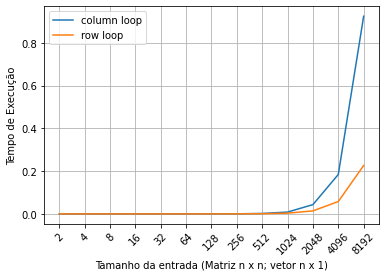

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

matrix_vector_by_row_data = pd.read_csv('./src/time-results/matrix_vector_by_row.log')
matrix_vector_by_column_data = pd.read_csv('./src/time-results/matrix_vector_by_column.log')

figure = plt.figure()
plt.grid(True)
plt.xscale('log', basex=2)
plt.xlabel('Tamanho da entrada (Matriz n x n; vetor n x 1)')
plt.ylabel('Tempo de Execução')
plt.xticks(matrix_vector_by_column_data['size'],(str(2**i) for i in range(1, 14)), rotation=45)

plt.plot(matrix_vector_by_column_data['size'], matrix_vector_by_column_data['time'])
plt.plot(matrix_vector_by_row_data['size'], matrix_vector_by_row_data['time'])
plt.legend(['column loop', 'row loop'])

plt.show()

Analisando o gráfico acima, nota-se que há um tamanho de entrada em que a diferença entre o tempo de execução das duas implementações se torna maior e começa a se acentuar cada vez mais. Especificamente à partir de tamanho de entrada maior que $1024$, a influência do tempo de acesso à memória sobre o tempo de execução final se torna cada vez mais aparente.

### Multiplicação Matriz por Matriz
De forma análoga à multiplicação de matriz por vetor, observamos o mesmo impacto referente à forma em que as matrizes são acessadas na memória. Para evidenciar tal efeito, foi implementado duas versões do algoritmo, um em que o *loop* de execução prioriza o percorrimento através das colunas e, outro, pelas linhas.

Tal impacto, pode ser claramente notado no gráfico abaixo, que compara tempos de execuções através de implementações com diferentes ordens de *loop*, no caso $jki$ (favorece colunas) e $ikj$ (favorece linhas).

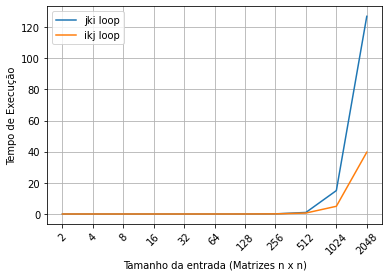

In [3]:
matrix_matrix_ikj_data = pd.read_csv('./src/time-results/matrix_matrix_ikj.log')
matrix_matrix_jki_data = pd.read_csv('./src/time-results/matrix_matrix_jki.log')

plt.close()
figure = plt.figure()
plt.grid(True)
plt.xscale('log', basex=2)
plt.xlabel('Tamanho da entrada (Matrizes n x n)')
plt.ylabel('Tempo de Execução')
plt.xticks(matrix_matrix_ikj_data['size'],(str(2**i) for i in range(1, 12)), rotation=45)

plt.plot(matrix_matrix_jki_data['size'], matrix_matrix_jki_data['time'])
plt.plot(matrix_matrix_ikj_data['size'], matrix_matrix_ikj_data['time'])
plt.legend(['jki loop', 'ikj loop'])

plt.show()

No gráfico acima, é possível notar que assim como o que ocorre na operação de multiplicação de matriz por vetor, existe um ponto de ruptura em que a diferença do tempo de execução de ambas implementações se torna cada vez mais acentuado, e no caso podemos observar que tal ponto ocorre quando o tamanho de entrada está em torno de $512$. Ademais, vale destacar que devido ao tempo de execução de ordem $\mathcal{O}(n^3)$, o crescimento desta diferença é muito mais acentuado do que no caso anterior, por isso foi possível notar o ponto de ruptura para um tamanho de entrada ainda menor se comparado à operação de multiplicação de matriz por vetor.